In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("twitter_training.csv")
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
data.columns = ['ID' ,'Candidate', 'Sentiment', 'Text']
data

,ID,Candidate,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
# Preprocess the text data by removing stop words, punctuation, converting
#  to lowercase, and other cleaning stdep

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Candidate  74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
print(data.isna().sum())
data = data.dropna( )
# print(data.isna().sum())

data.head(10)


ID             0
Candidate      0
Sentiment      0
Text         686
dtype: int64


,ID,Candidate,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [7]:
data['Sentiment'].unique()


array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [8]:
y = pd.get_dummies(data["Sentiment"]).astype(int)
y

,Irrelevant,Negative,Neutral,Positive
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
74676,0,0,0,1
74677,0,0,0,1
74678,0,0,0,1
74679,0,0,0,1


In [9]:
import re
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['Text'] = data['Text'].apply(preprocess_text)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-bcf0d0630b95>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(preprocess_text)


,ID,Candidate,Sentiment,Text
0,2401,Borderlands,Positive,coming borders kill
1,2401,Borderlands,Positive,im getting borderlands kill
2,2401,Borderlands,Positive,im coming borderlands murder
3,2401,Borderlands,Positive,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting borderlands murder


<Axes: xlabel='Sentiment', ylabel='count'>

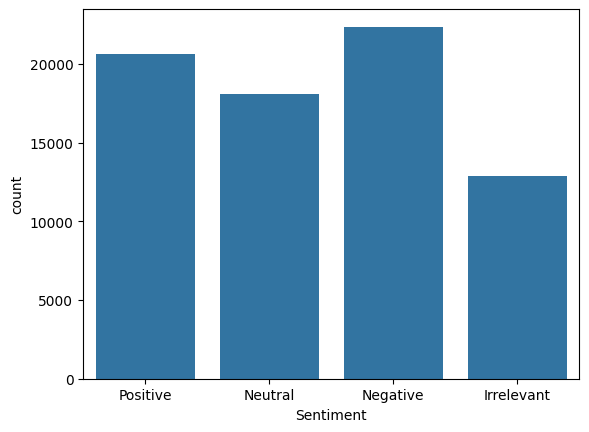

In [10]:
import seaborn as sns

sns.countplot(x = data["Sentiment"])

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Text'])

sequences = tokenizer.texts_to_sequences(data['Text'])


#padding
padded_sequences = pad_sequences(sequences, padding='post', maxlen = 30 )

print(f"Total sentences are :{len(padded_sequences) } \n")

print(padded_sequences)

Total sentences are :73995 

[[  289  6420   315 ...     0     0     0]
 [    5    85    58 ...     0     0     0]
 [    5   289    58 ...     0     0     0]
 ...
 [ 1777   486 12472 ...     0     0     0]
 [ 1777   486 12472 ...     0     0     0]
 [    2   486 12472 ...     0     0     0]]


In [12]:
##maxlen for each sentence is set to 25 to inc accuracy..


print(padded_sequences[1000:1020])


[[ 2590   299   577  2307   890    17  2684  1976    51   199  2492   306
   1541     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [ 2590    44   299   890   577  2307    58    17  2684     9   178    51
   2492   316   306  1541     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  123  2590   299   577  2307    17  2684   178    51  2492   306  1081
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [   21 16045   124  1857  1123  3437 12539  2004    10     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  125  2006   124  1857  1123  3437 12539  2004    10     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [16045   124  1123  3437 29669  2004    10     0     0     0    

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.regularizers import l2


model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=30, input_length=padded_sequences.shape[1]))
model.add(SpatialDropout1D(0.3))

model.add(LSTM(300, return_sequences=True) )
model.add(LSTM(50, return_sequences=False) )

# model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(4, activation='softmax'))
model.build(input_shape=(None, padded_sequences.shape[1]))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.fit(padded_sequences, y, epochs=10, batch_size=500, validation_split=0.35)

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.3002 - loss: 1.3771 - val_accuracy: 0.2807 - val_loss: 1.3649
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3991 - loss: 1.2861 - val_accuracy: 0.3293 - val_loss: 1.4448
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5303 - loss: 1.0519 - val_accuracy: 0.3247 - val_loss: 1.5064
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5919 - loss: 0.9428 - val_accuracy: 0.3682 - val_loss: 1.6493
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7082 - loss: 0.7218 - val_accuracy: 0.3841 - val_loss: 1.8726
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8040 - loss: 0.5368 - val_accuracy: 0.3663 - val_loss: 2.0907
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.8497 - loss: 0.4177 - val_accuracy: 0.3874 - val_loss: 2.2909
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8898 - loss: 0.3078 - val_accuracy: 0.3916 - v

In [15]:
# Evaluate the model's performance on the validation data
loss, accuracy = model.evaluate(padded_sequences, y, verbose=2)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

2313/2313 - 13s - 6ms/step - accuracy: 0.7522 - loss: 0.9893
Validation Loss: 0.9892502427101135
Validation Accuracy: 0.7521859407424927
